In [14]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Discussion

In [3]:
x_avg = 70
x_sd = 10
y_avg = 50
y_sd = 12
r = 0.75

In [2]:
# 90 on midterm
(90 - 70) / 10

2.0

In [4]:
r * 2.0

1.5

In [5]:
1.5 * y_sd + y_avg

68.0

In [6]:
# 60 on midterm
(60 - 70) / 10

-1.0

In [8]:
r * -1.0

-0.75

In [10]:
-0.75 * y_sd + y_avg

41.0

## Linear regression

In [11]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [39]:
def slope(t, x, y):
    """The slope of the regression line (original units)"""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)"""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

## Least squares

In [15]:
little_women = Table.read_table('http://inferentialthinking.com/notebooks/little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


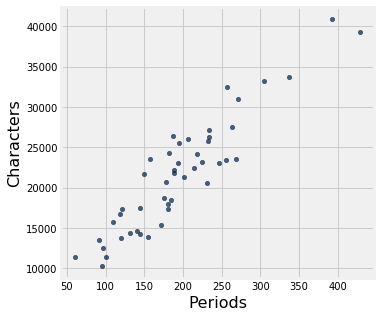

In [16]:
little_women.scatter(0, 1)

In [17]:
correlation(little_women, 'Periods', 'Characters')

0.92295768958548163

In [18]:
def fit(t, x, y):
    """Return the predicted y-value for each x-value"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

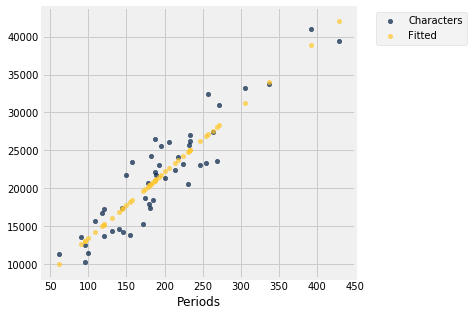

In [21]:
little_women.with_column(
    'Fitted', fit(little_women, 0, 1)
).scatter('Periods')

In [22]:
sample = [[131, 14431], [231, 20558], [392, 40935], [157, 23524]]
def lw_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'characters per period')
    print('Intercept:', np.round(intercept), 'characters')
    little_women.scatter('Periods', 'Characters')
    xlims = np.array([50, 450])
    plt.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plt.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     87.0 characters per period
Intercept: 4745.0 characters


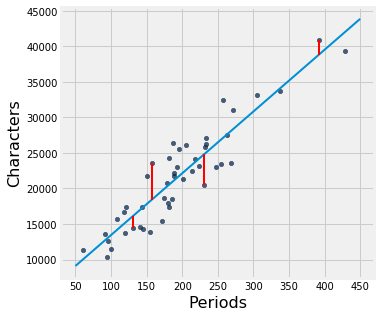

In [23]:
lw_reg_slope = slope(little_women, 0, 1)
lw_reg_intercept = intercept(little_women, 0, 1)
lw_errors(lw_reg_slope, lw_reg_intercept)

Slope:     50 characters per period
Intercept: 10000 characters


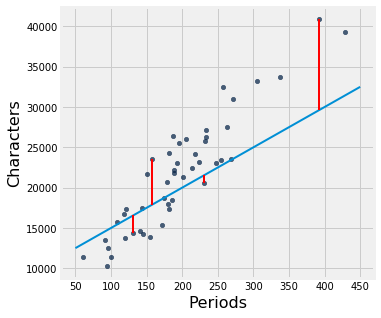

In [24]:
lw_errors(50, 10000)

Slope:     -100 characters per period
Intercept: 50000 characters


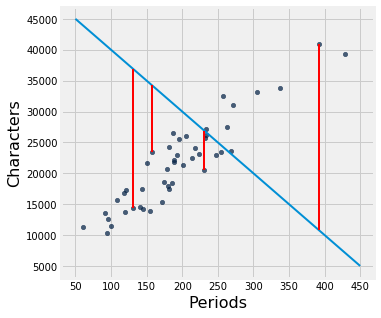

In [25]:
lw_errors(-100, 50000)

In [32]:
def lw_rmse(slope, intercept):
    lw_errors(slope, intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    return np.sqrt(np.mean((y - fitted) ** 2))

Slope:     50 characters per period
Intercept: 10000 characters


4322.1678317665373

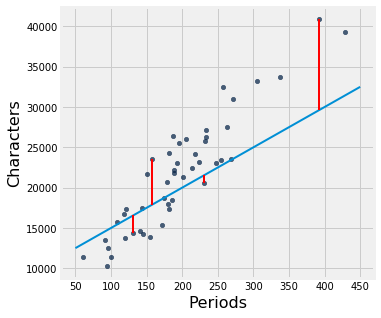

In [33]:
lw_rmse(50, 10000)

Slope:     -100 characters per period
Intercept: 50000 characters


16710.119837353752

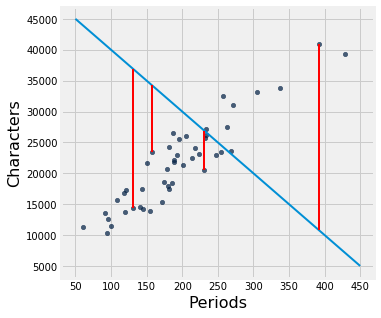

In [34]:
lw_rmse(-100, 50000)

Slope:     90 characters per period
Intercept: 4000 characters


2715.5391063834586

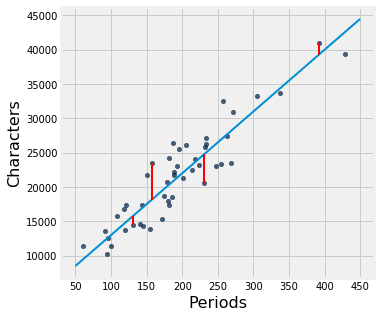

In [35]:
lw_rmse(90, 4000)

Slope:     87.0 characters per period
Intercept: 4745.0 characters


2701.690785311856

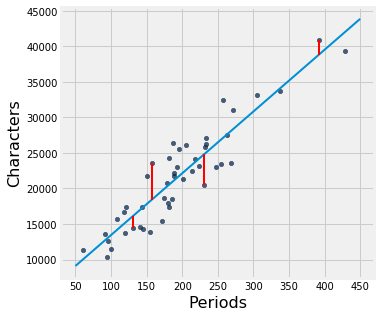

In [36]:
lw_rmse(lw_reg_slope, lw_reg_intercept)

## Numerical Optimization

In [41]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column(0)
    y = little_women.column(1)
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [42]:
lw_mse(90, 4000)

7374152.6382978726

In [43]:
np.sqrt(lw_mse(90, 4000))

2715.5391063834586

In [45]:
def f(x):
    return (x - 3) ** 2 + 1

In [46]:
[f(1), f(2), f(3), f(4), f(5)]

[5, 2, 1, 2, 5]

In [47]:
minimize(f)

2.999999999968361

In [48]:
lw_mse(90, 4000)

7374152.6382978726

In [50]:
minimize(lw_mse)

array([   86.97784117,  4744.78484535])

In [52]:
make_array(lw_reg_slope, lw_reg_intercept)

array([   86.97784126,  4744.78479657])

## Non-linear regression

In [53]:
shotput = Table.read_table('http://inferentialthinking.com/notebooks/shotput.csv')
shotput.show(3)

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4


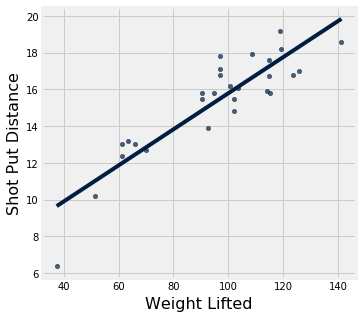

In [55]:
shotput.scatter(0, fit_line=True)

$$ a x + b $$

Try to find the best quadratic curve:

$$
a x ^ 2 + bx + c
$$

In [66]:
def shotput_quad_mse(a, b, c):
    x = shotput.column(0)
    y = shotput.column(1)
    fitted = a*x**2 + b * x + c
    return np.mean((y - fitted) ** 2)

In [67]:
best = minimize(shotput_quad_mse)
best

array([ -1.04004838e-03,   2.82708045e-01,  -1.53182115e+00])

In [68]:
a, b, c = best
a, b, c

(-0.0010400483813011005, 0.28270804451801729, -1.5318211488204392)

In [69]:
a, b, c = best
x = shotput.column(0)
quad_fitted = a*x**2 + b * x + c
quad_fitted

array([  7.60716248,  10.26917482,  11.89000258,  11.89000258,
        12.24145638,  12.61099081,  13.1615049 ,  15.73777722,
        15.53500063,  15.53500063,  15.92194507,  16.10504395,
        16.10504395,  16.10504395,  16.48373603,  16.48373603,
        16.59393459,  16.36821243,  16.89257997,  17.18042716,
        17.2379196 ,  17.22060404,  17.21182145,  17.52211563,
        17.57341959,  17.38581827,  17.37878297,  17.6517423 ])

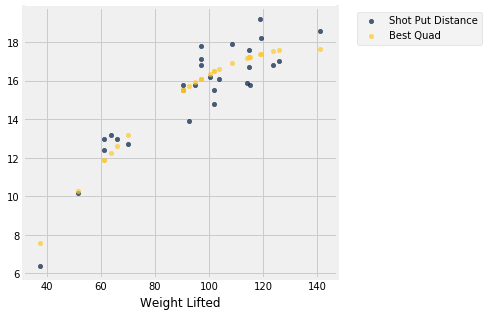

In [71]:
shotput.with_column('Best Quad', quad_fitted).scatter(0)